In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
data = pd.read_csv("../data/cleaned.csv")

In [3]:
data

,data,dia_semana,pontuacao,regularidade,duracao,sono_leve,sono_leve_perc,sono_profundo,sono_profundo_perc,REM,REM_perc,tempo_acordado,vezes_acordado
0,2025-05-01,quinta-feira,72,90,478,337,70.50,39,8.16,102,21.34,6,3
1,2025-05-02,sexta-feira,93,90,464,314,67.67,80,17.24,70,15.09,6,1
2,2025-05-03,sábado,80,90,539,360,66.79,83,15.40,96,17.81,12,4
3,2025-05-04,domingo,77,95,515,338,65.63,72,13.98,105,20.39,29,4
4,2025-05-05,segunda-feira,85,89,428,258,60.28,72,16.82,98,22.90,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2025-07-08,terça-feira,78,71,519,338,65.13,63,12.14,118,22.74,8,3
69,2025-07-09,quarta-feira,82,75,505,358,70.89,73,14.46,74,14.65,5,3
70,2025-07-10,quinta-feira,76,74,472,324,68.64,58,12.29,90,19.07,4,2
71,2025-07-11,sexta-feira,85,77,483,309,63.98,76,15.73,98,20.29,9,2


Criação de lista "Métricas"

In [4]:
metricas = ["pontuacao","regularidade", 
            "duracao", "sono_leve","sono_leve_perc", 
            "sono_profundo", "sono_profundo_perc", "REM", "REM_perc", 
            "tempo_acordado", "vezes_acordado"]

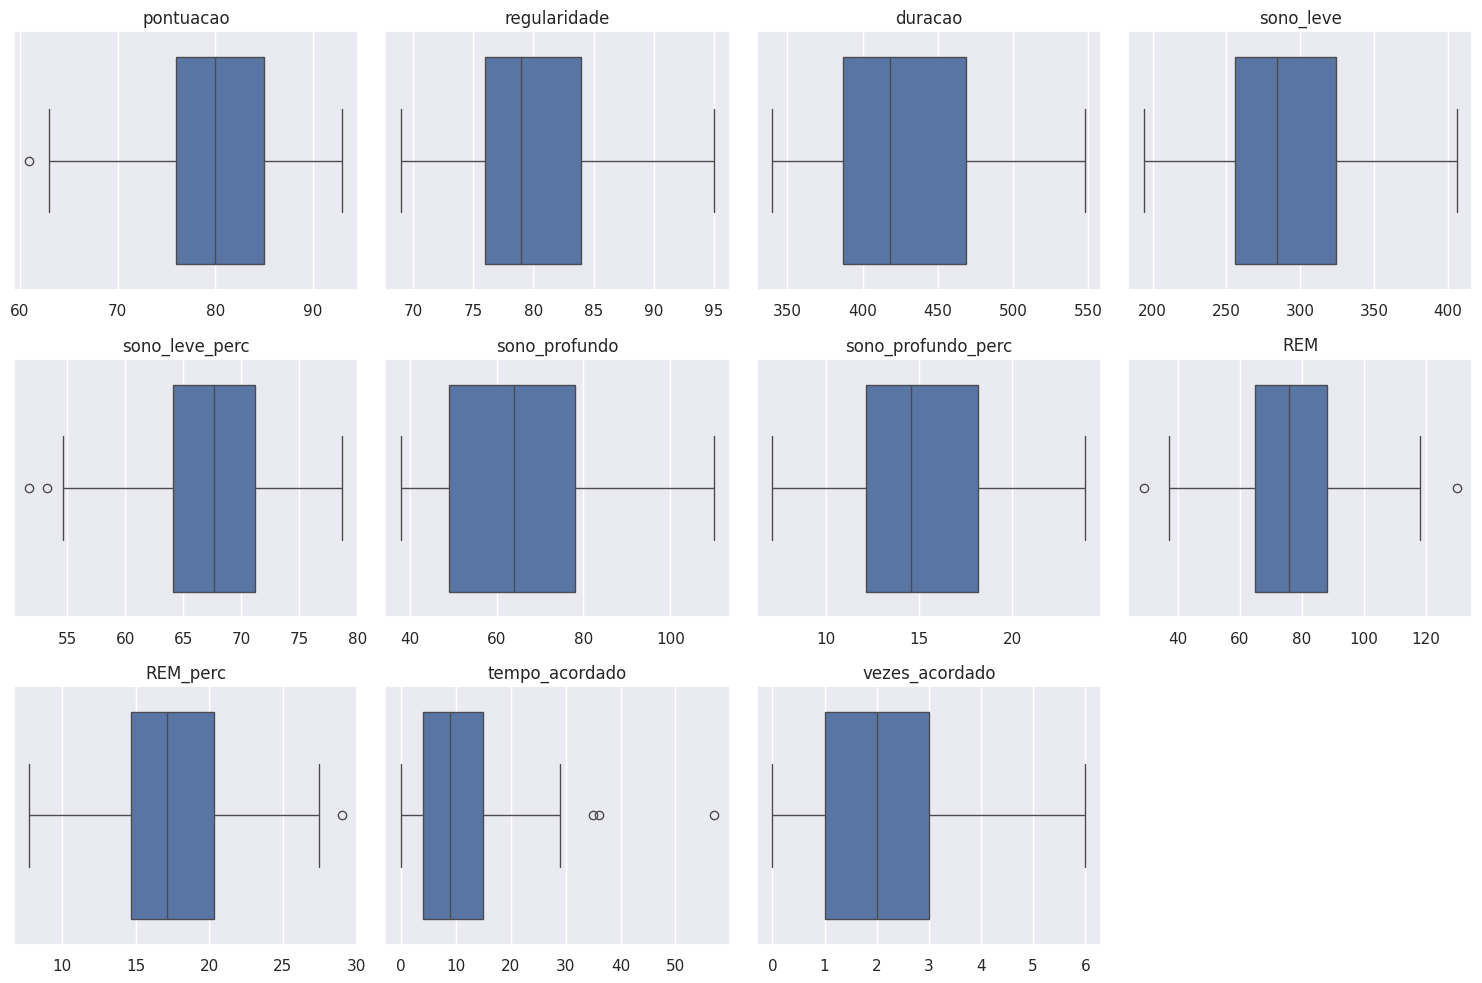

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten() 

for i, metrica in enumerate(metricas):
    ax = axes[i]
    sns.boxplot(x=data[metrica], ax=ax)
    ax.set_title(metrica)
    ax.set_xlabel("")

for j in range(len(metricas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [6]:
outliers = ["pontuacao", "sono_leve_perc", "REM", "REM_perc", "tempo_acordado"]

Visualização de outliers 

Utilização de Scater Plot para visualizar dados

Utilização de Line Plot para visualizar Linha Inferior, Linha Superior e Média


Análise de Outliers - pontuacao
• Primeiro Quartil (Q1): 76.00
• Terceiro Quartil (Q3): 85.00
• IQR: 9.00
• Limite Inferior: 62.50
• Limite Superior: 98.50
• Outliers Detected: 1


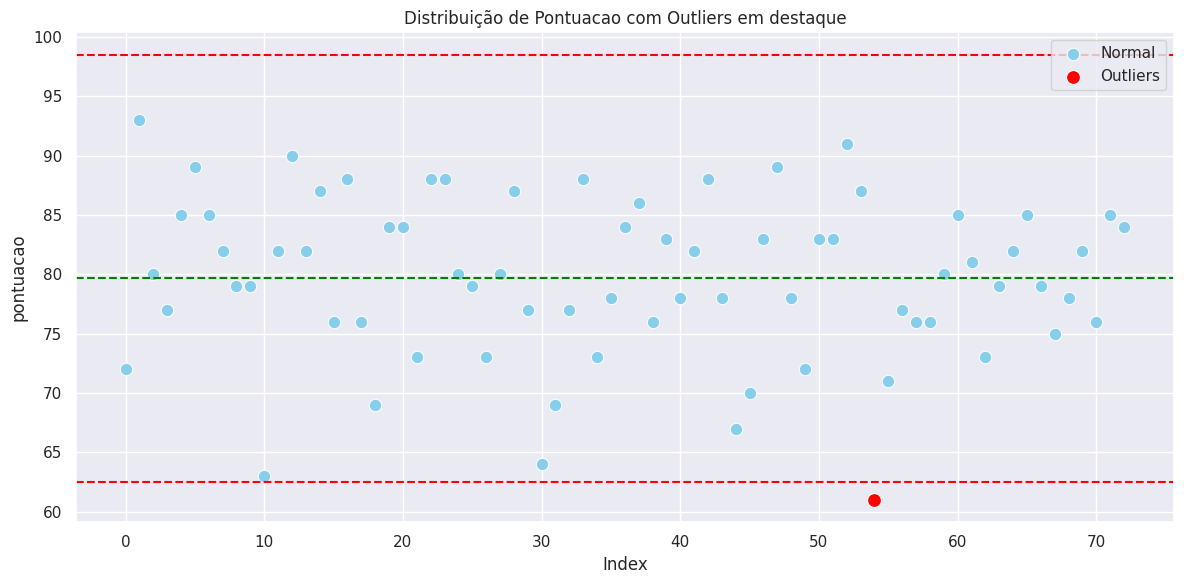


Análise de Outliers - sono_leve_perc
• Primeiro Quartil (Q1): 64.09
• Terceiro Quartil (Q3): 71.18
• IQR: 7.09
• Limite Inferior: 53.45
• Limite Superior: 81.82
• Outliers Detected: 2


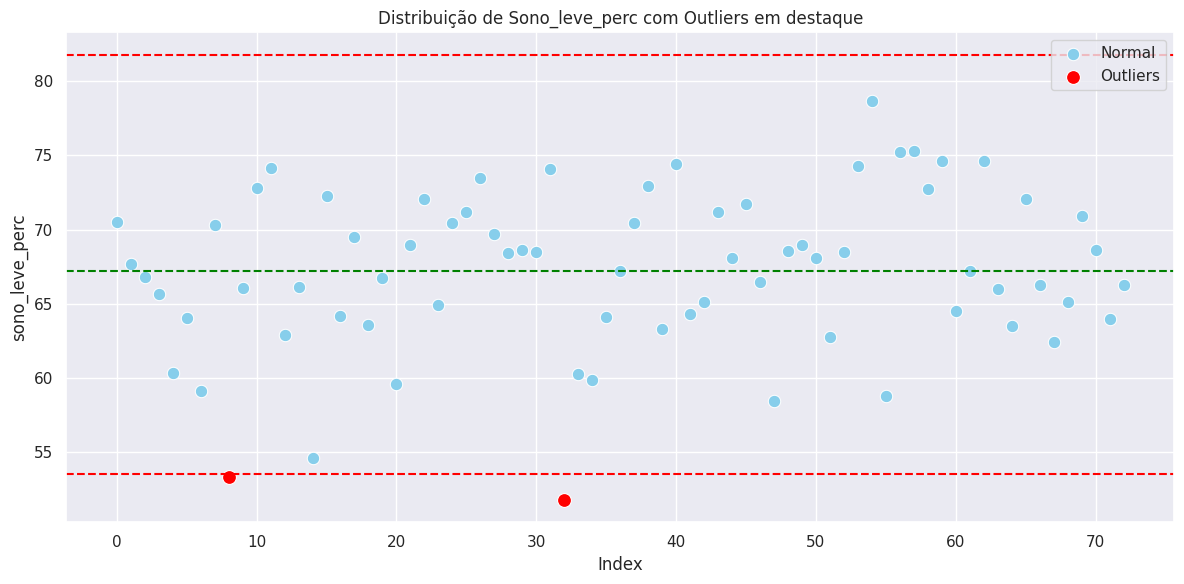


Análise de Outliers - REM
• Primeiro Quartil (Q1): 65.00
• Terceiro Quartil (Q3): 88.00
• IQR: 23.00
• Limite Inferior: 30.50
• Limite Superior: 122.50
• Outliers Detected: 2


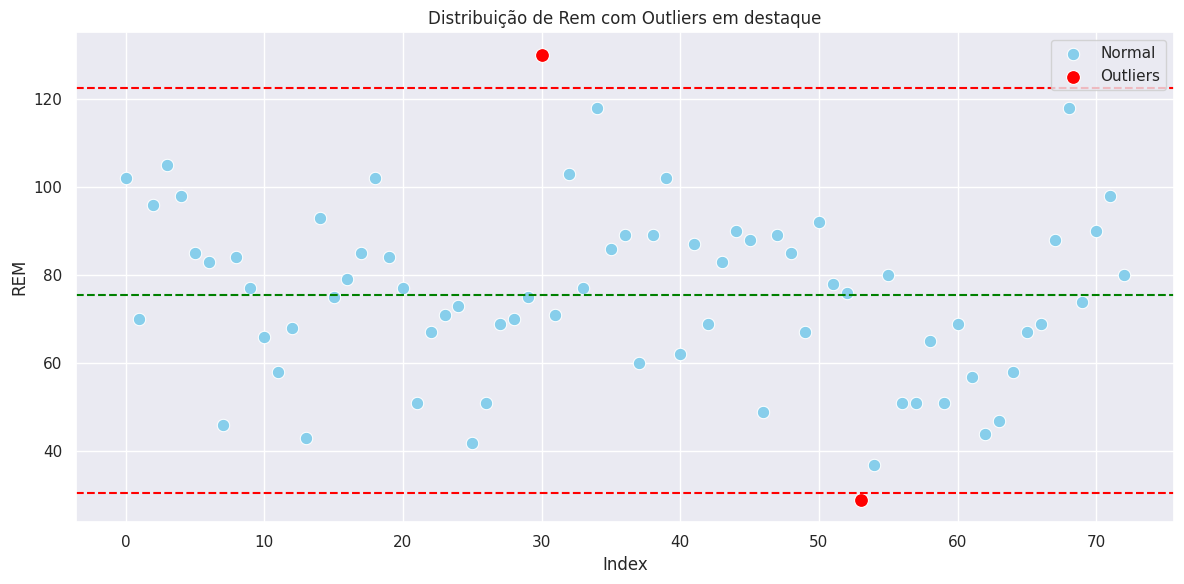


Análise de Outliers - REM_perc
• Primeiro Quartil (Q1): 14.66
• Terceiro Quartil (Q3): 20.34
• IQR: 5.68
• Limite Inferior: 6.14
• Limite Superior: 28.86
• Outliers Detected: 1


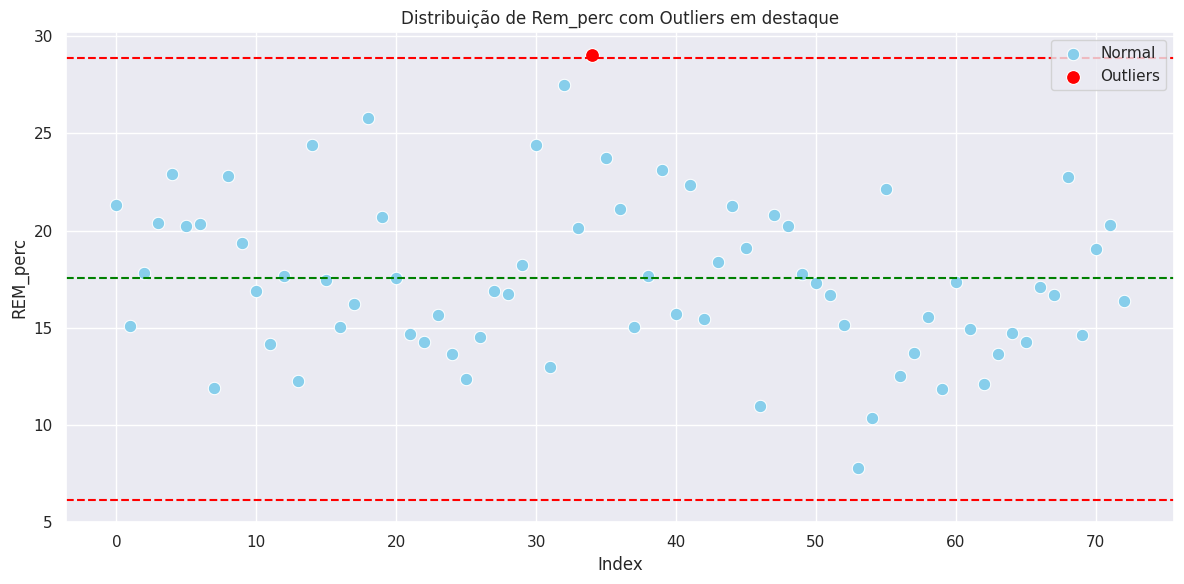


Análise de Outliers - tempo_acordado
• Primeiro Quartil (Q1): 4.00
• Terceiro Quartil (Q3): 15.00
• IQR: 11.00
• Limite Inferior: -12.50
• Limite Superior: 31.50
• Outliers Detected: 3


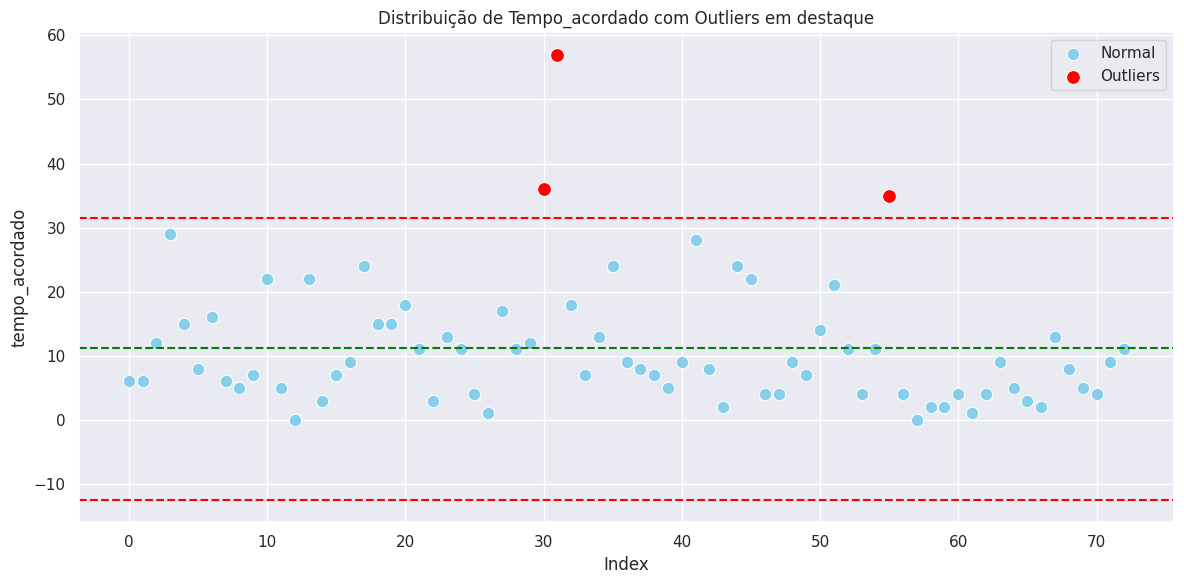

In [7]:
for outlier in outliers:
    Q1 = data[outlier].quantile(0.25)
    Q3 = data[outlier].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_mask = (data[outlier] < limite_inferior) | (data[outlier] > limite_superior)
    outliers_df = data[outliers_mask].copy()
    non_outliers_df = data[~outliers_mask].copy()

    print(f"\nAnálise de Outliers - {outlier}")
    print(f"• Primeiro Quartil (Q1): {Q1:.2f}")
    print(f"• Terceiro Quartil (Q3): {Q3:.2f}")
    print(f"• IQR: {IQR:.2f}")
    print(f"• Limite Inferior: {limite_inferior:.2f}")
    print(f"• Limite Superior: {limite_superior:.2f}")
    print(f"• Outliers Detected: {len(outliers_df)}")

    plt.figure(figsize=(12, 6))

    media = data[outlier].mean()

    sns.scatterplot(x=non_outliers_df.index, y=non_outliers_df[outlier], color="skyblue", label="Normal", s=80)
    sns.scatterplot(x=outliers_df.index, y=outliers_df[outlier], color="red", label="Outliers", s=100) 
    plt.axhline(limite_superior, color="red", linestyle="--")
    plt.axhline(limite_inferior, color="red", linestyle="--")
    plt.axhline(media, color="green", linestyle="--")

    plt.title(f"Distribuição de {outlier.capitalize()} com Outliers em destaque")
    plt.xlabel("Index")
    plt.ylabel(outlier)
    plt.legend()
    plt.tight_layout()
    plt.show()

Visualização de Histogramas

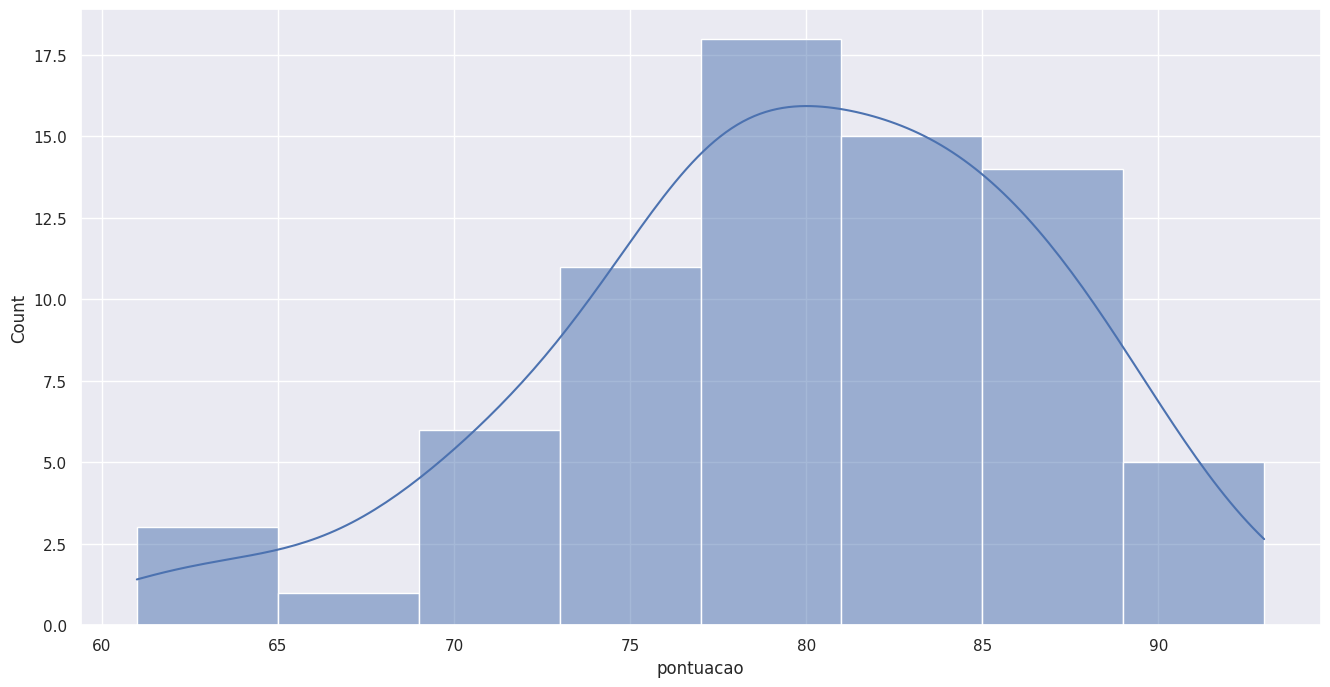

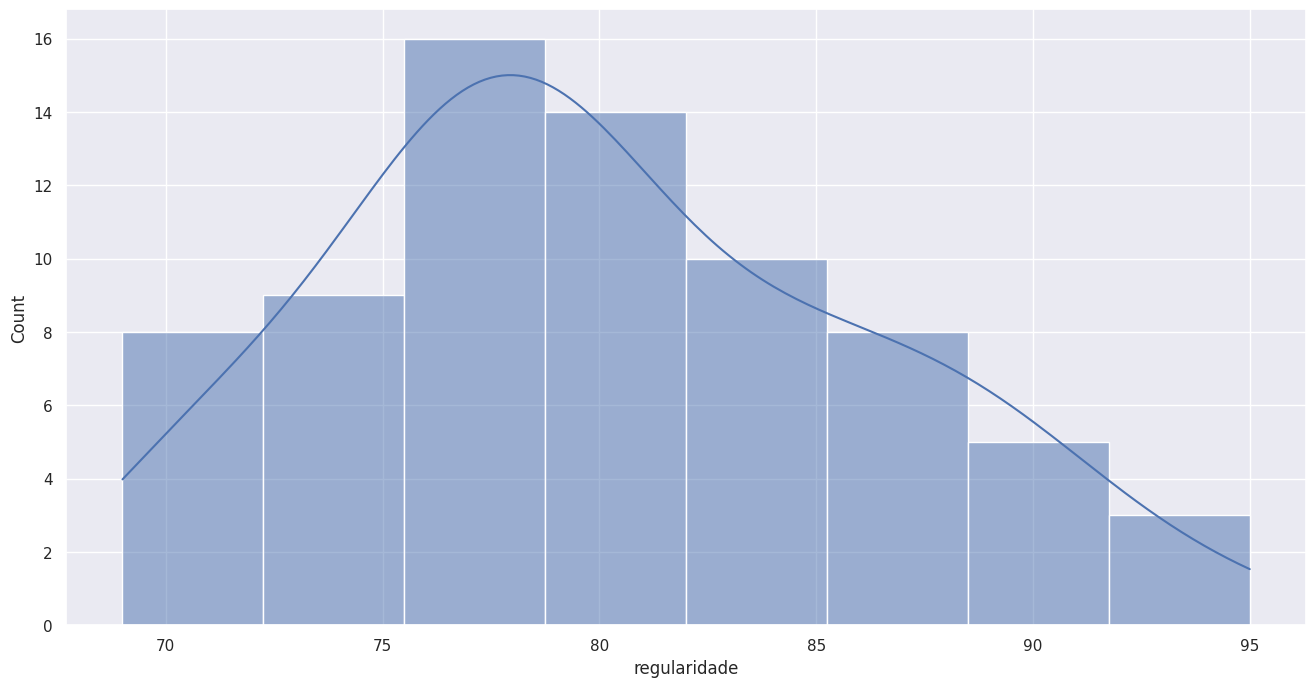

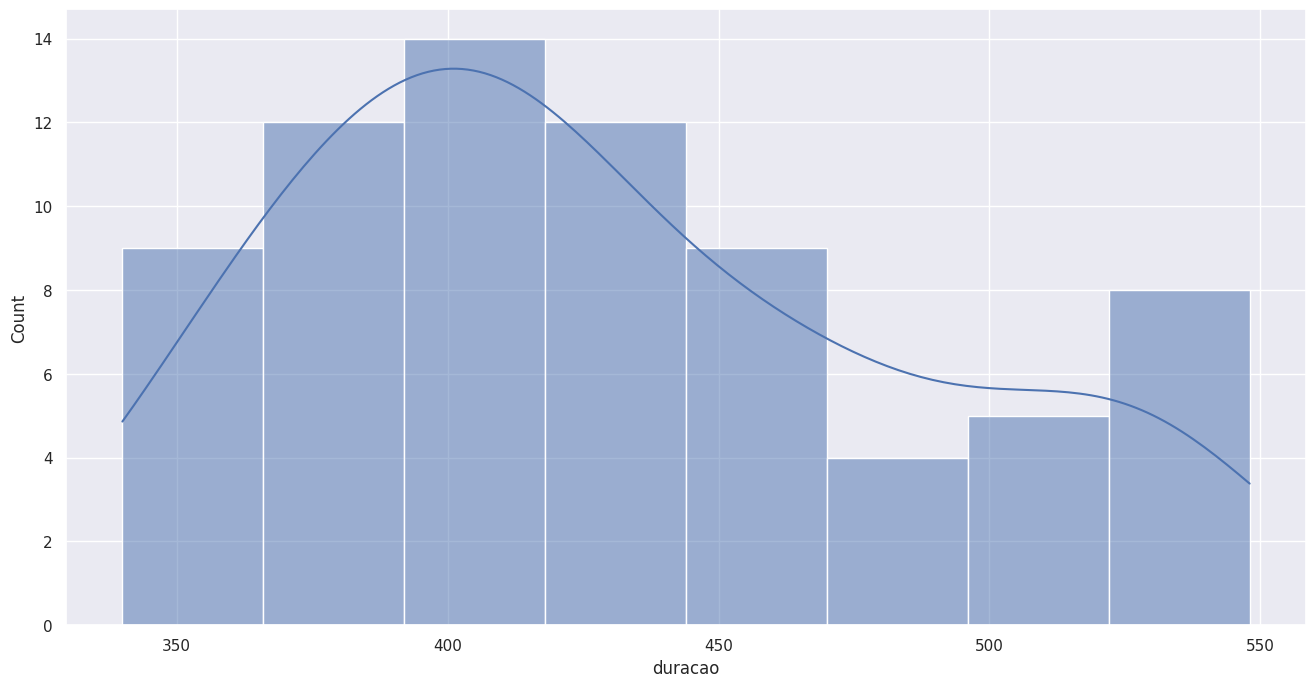

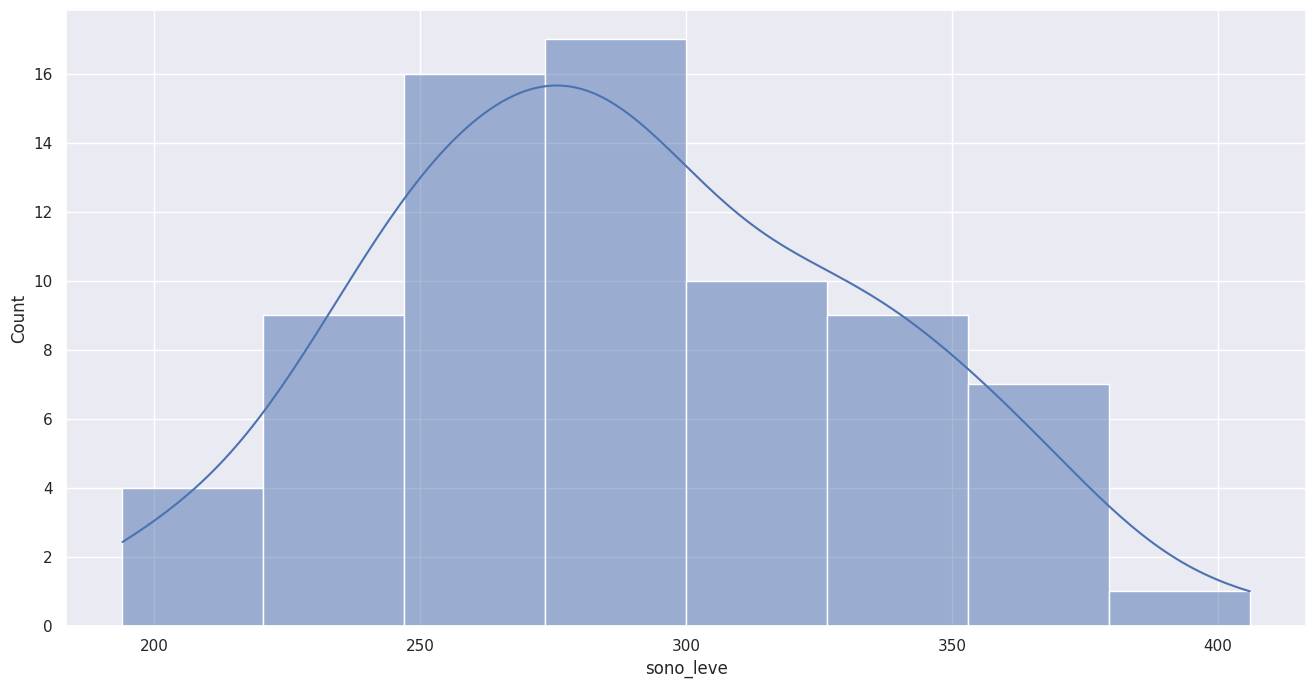

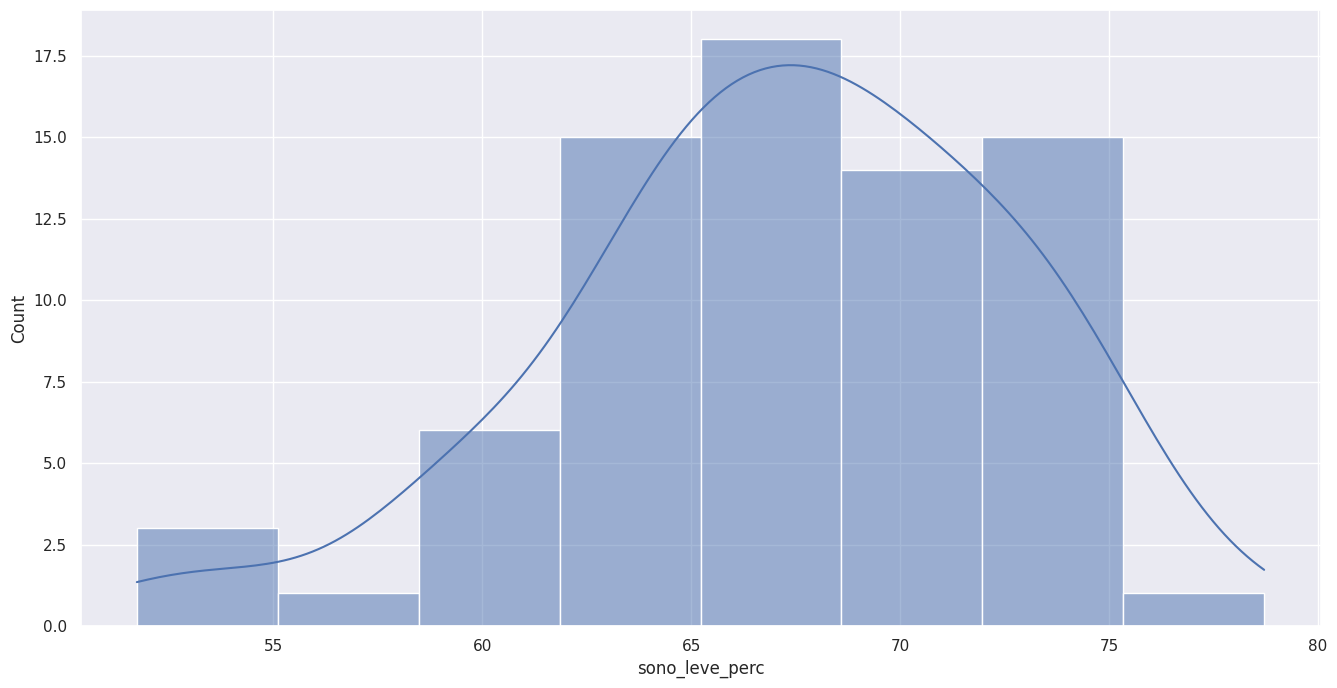

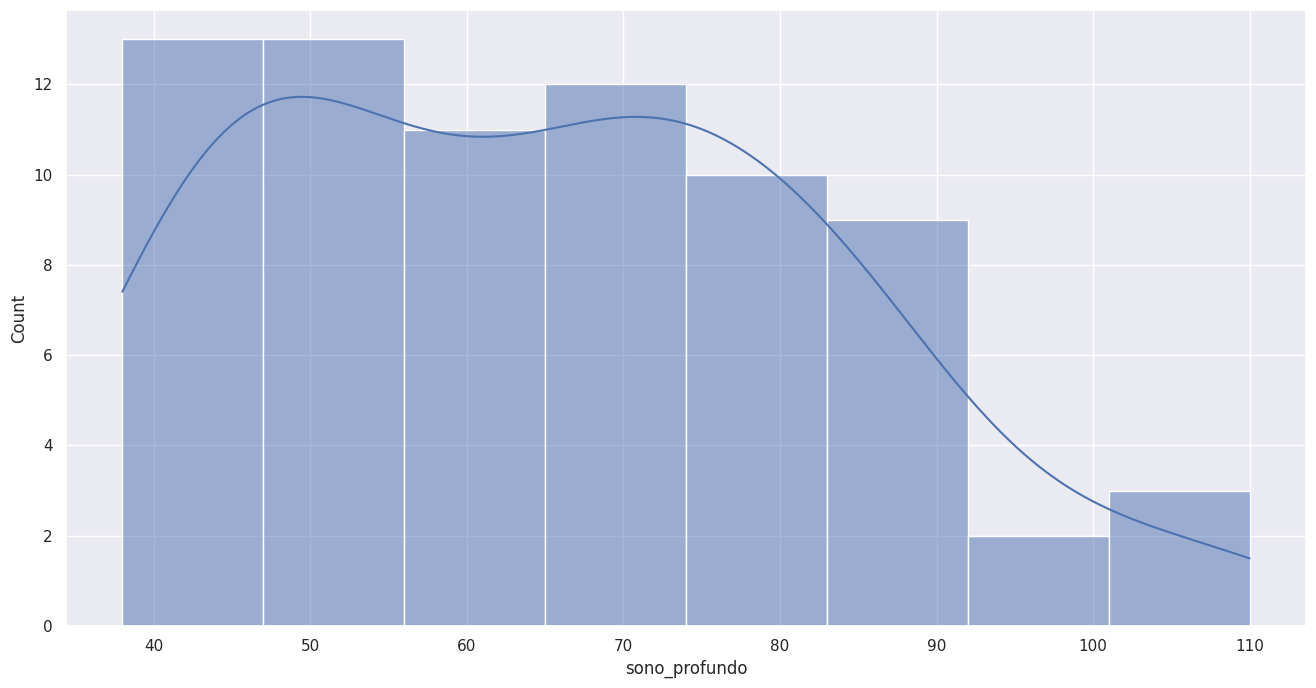

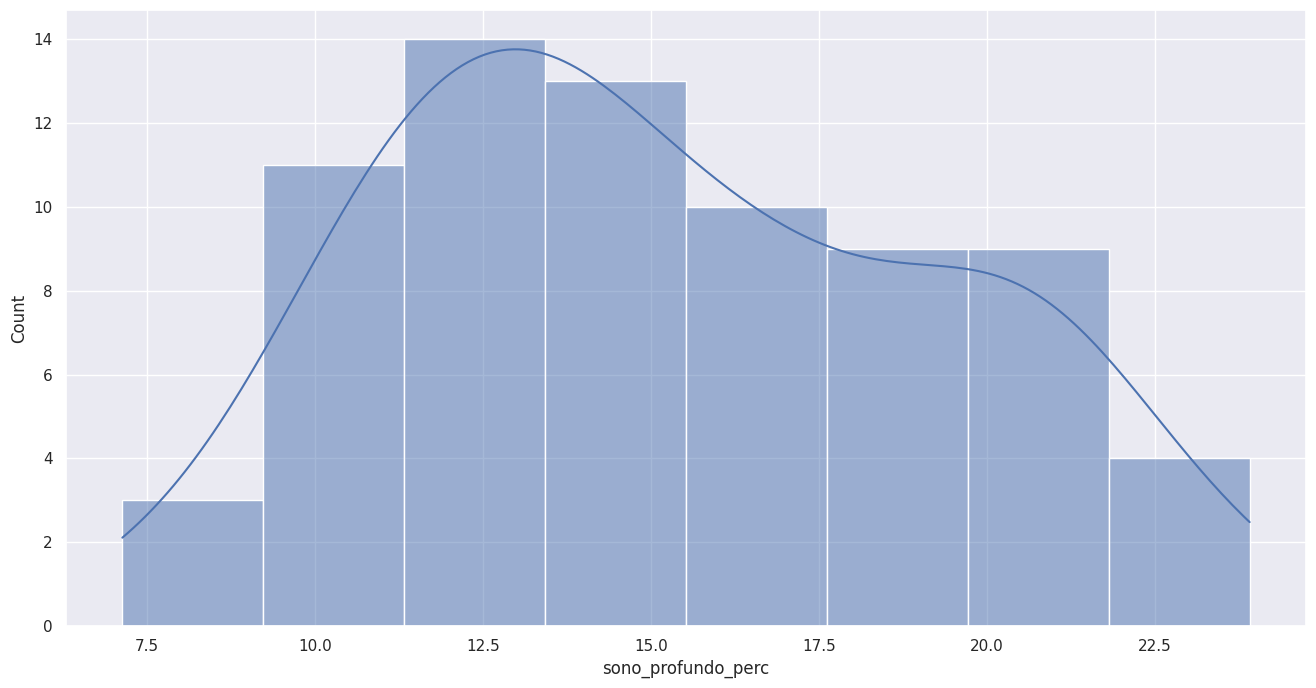

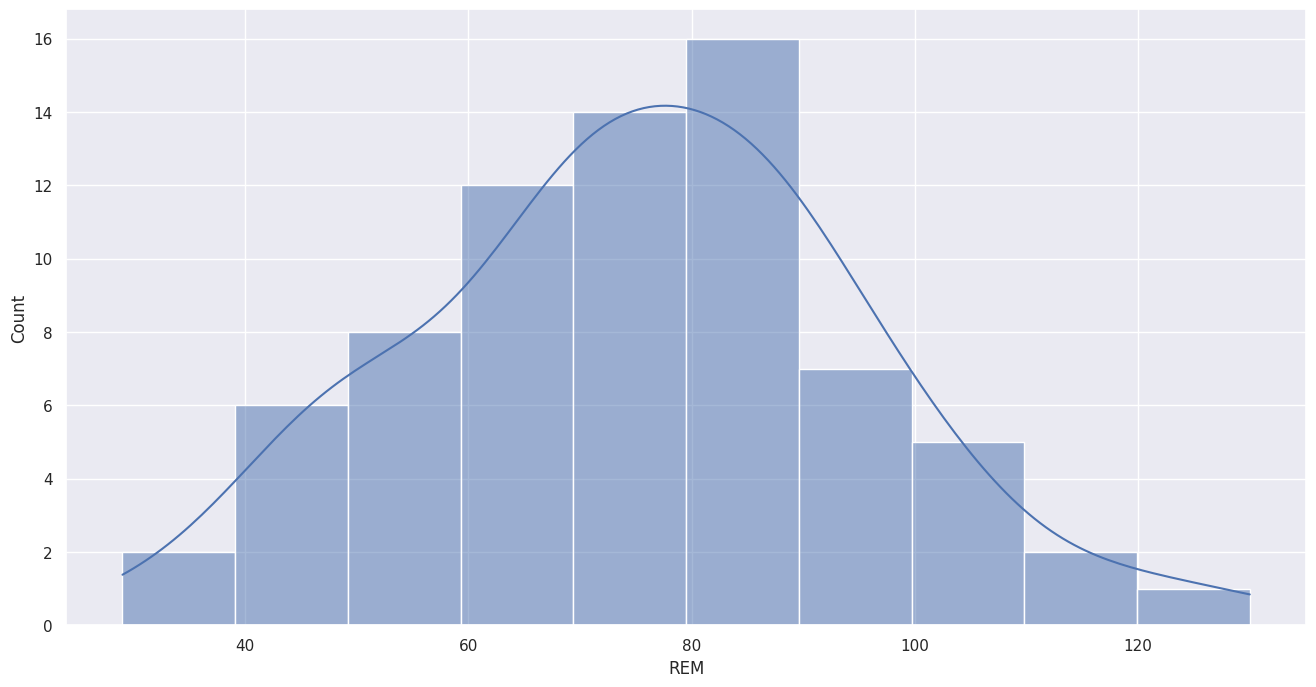

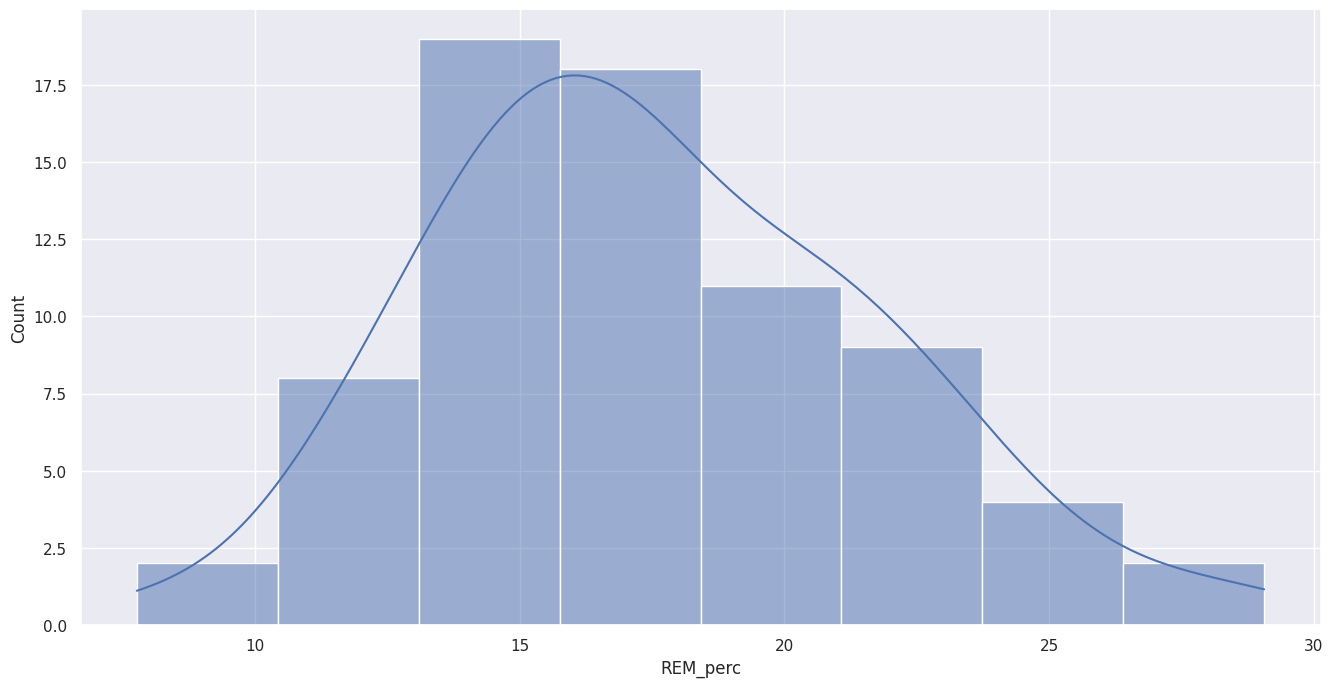

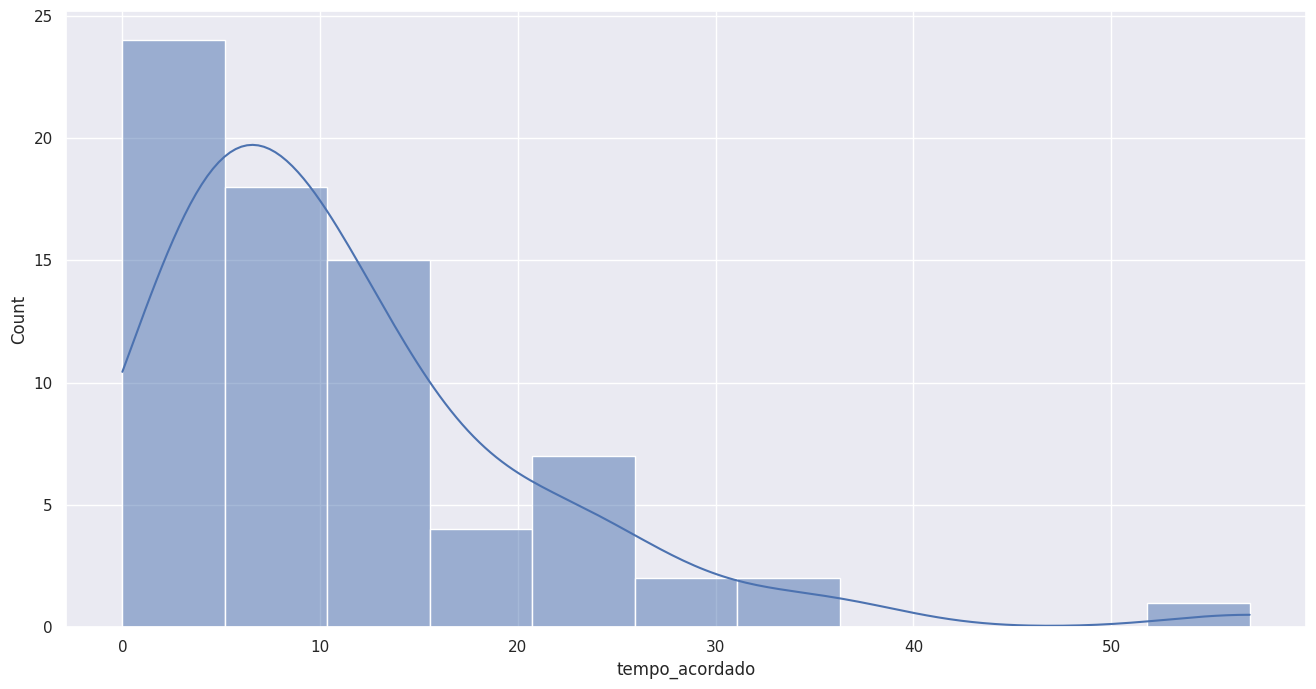

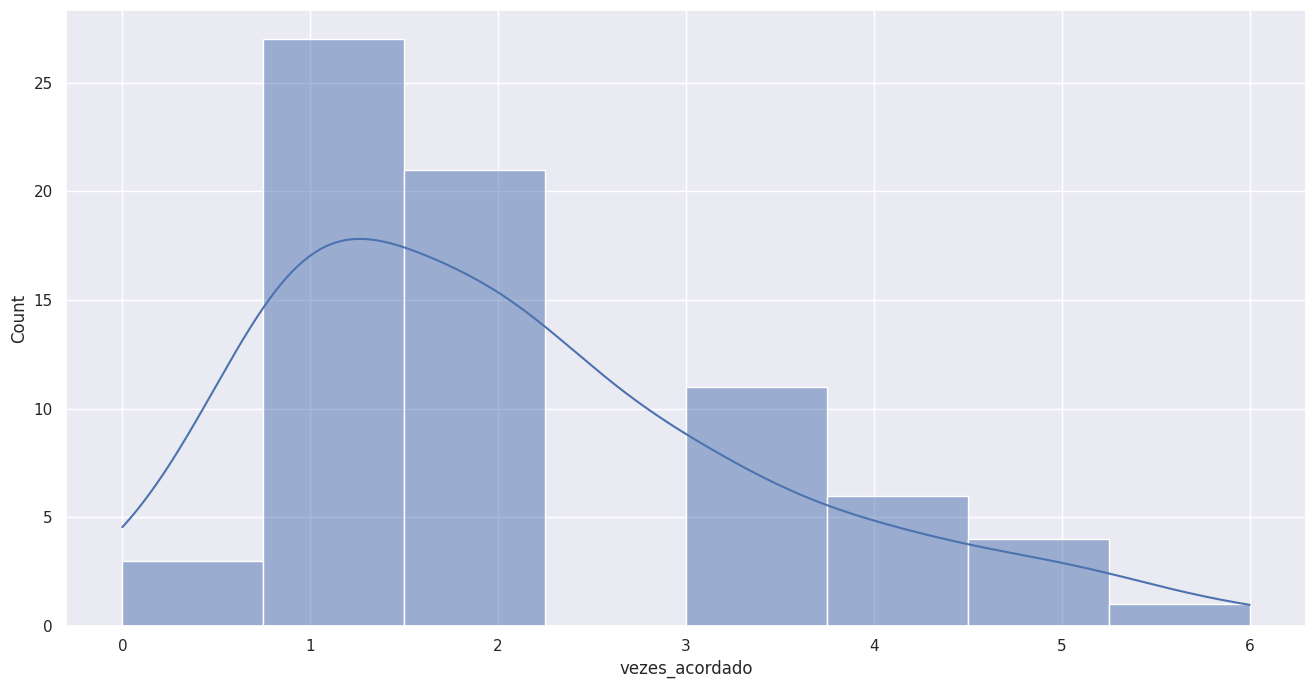

In [8]:
for metrica in metricas:
  plt.figure(figsize=(16, 8))
  sns.histplot(data=data, x=metrica, kde=True)

Visualização de Violin Plot

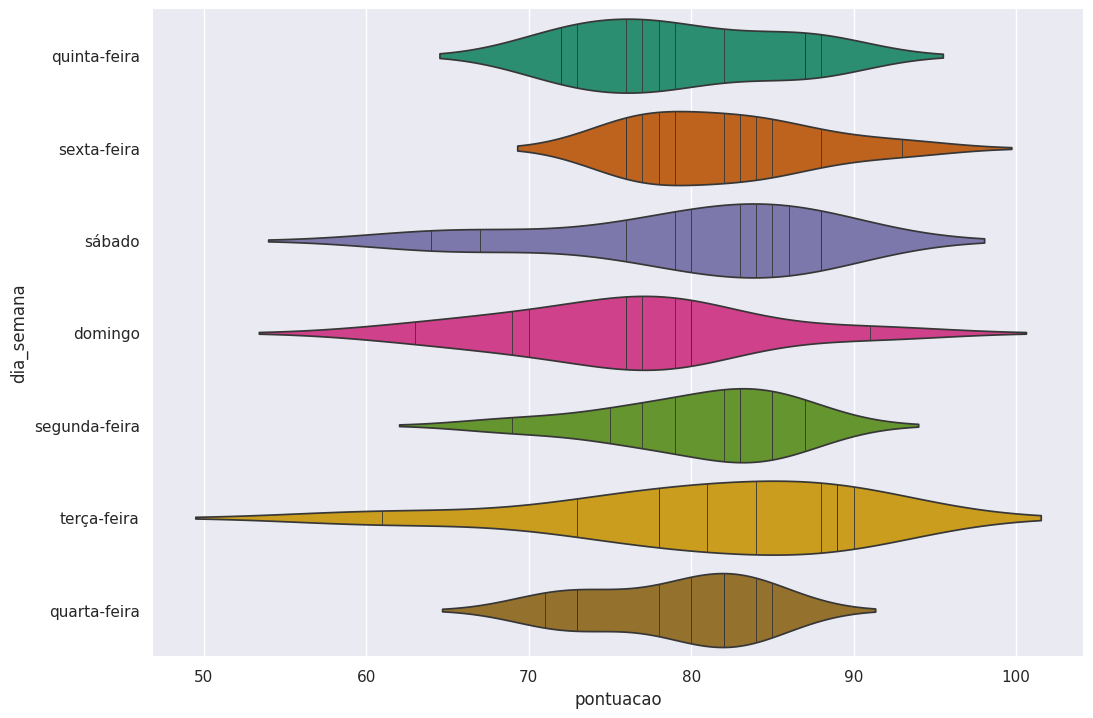

In [13]:
figsize = (12, 1.2 * len(data['dia_semana'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='pontuacao', y='dia_semana', inner='stick', palette='Dark2', hue='dia_semana', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

In [14]:
media_pontuacao = data["pontuacao"].mean()
media_pontuacao

np.float64(79.71232876712328)

Visualização geral de Pontuação e linha de média

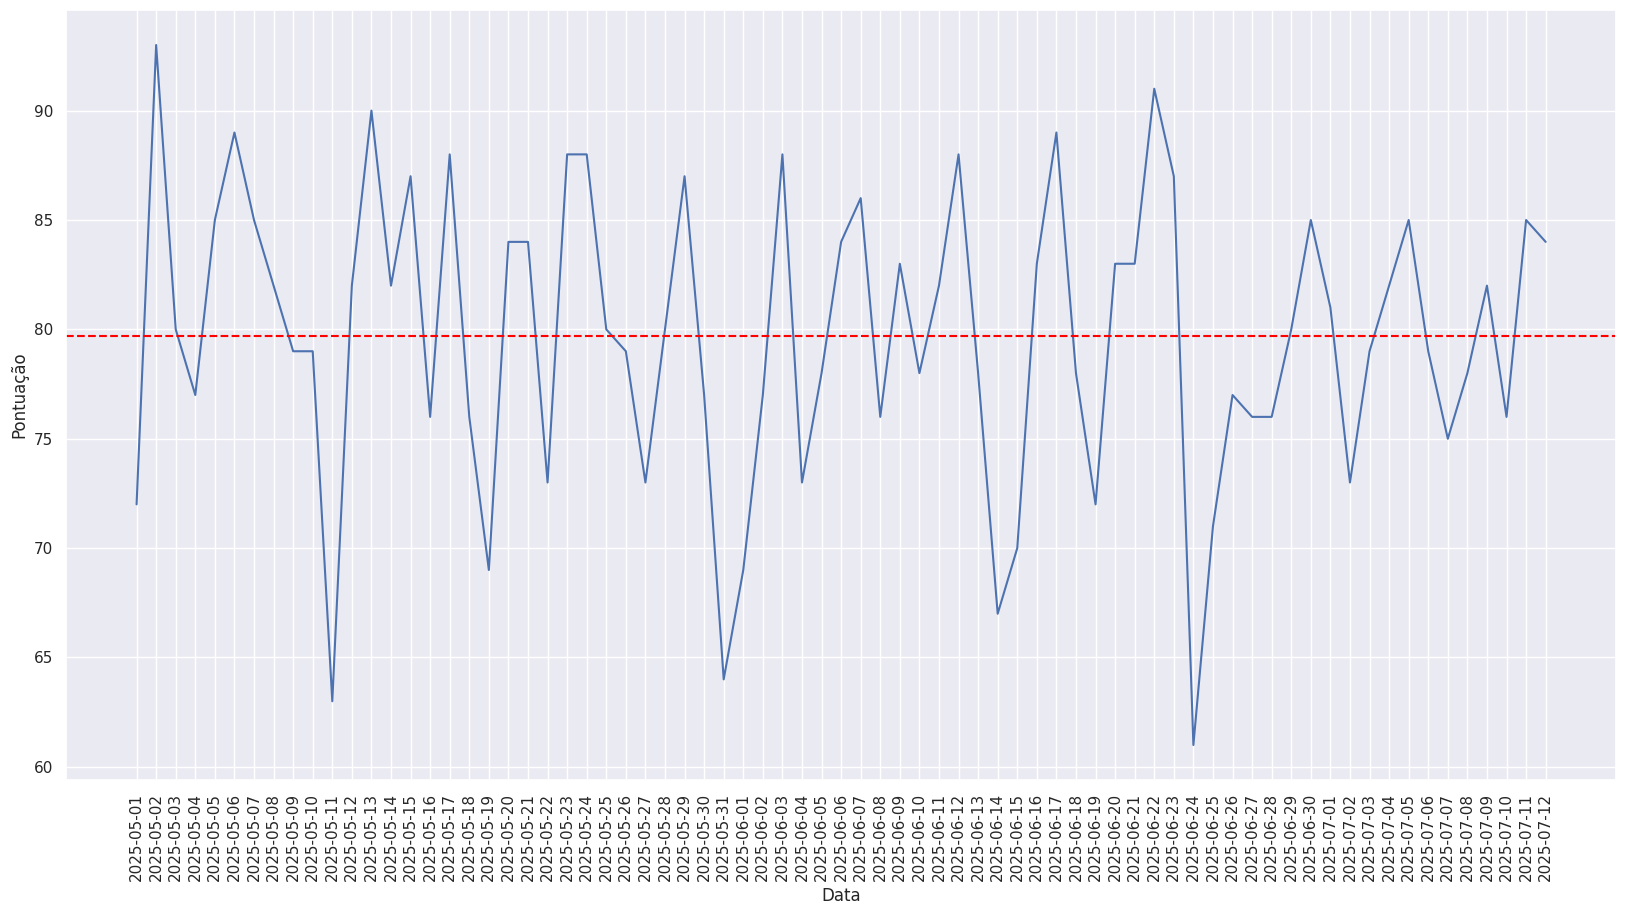

In [17]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x="data", y="pontuacao")
plt.axhline(media_pontuacao, color="red", linestyle="--")
plt.ylabel("Pontuação")
plt.xticks(rotation=90)
plt.xlabel("Data")
plt.show()

Gráfico de Correlação

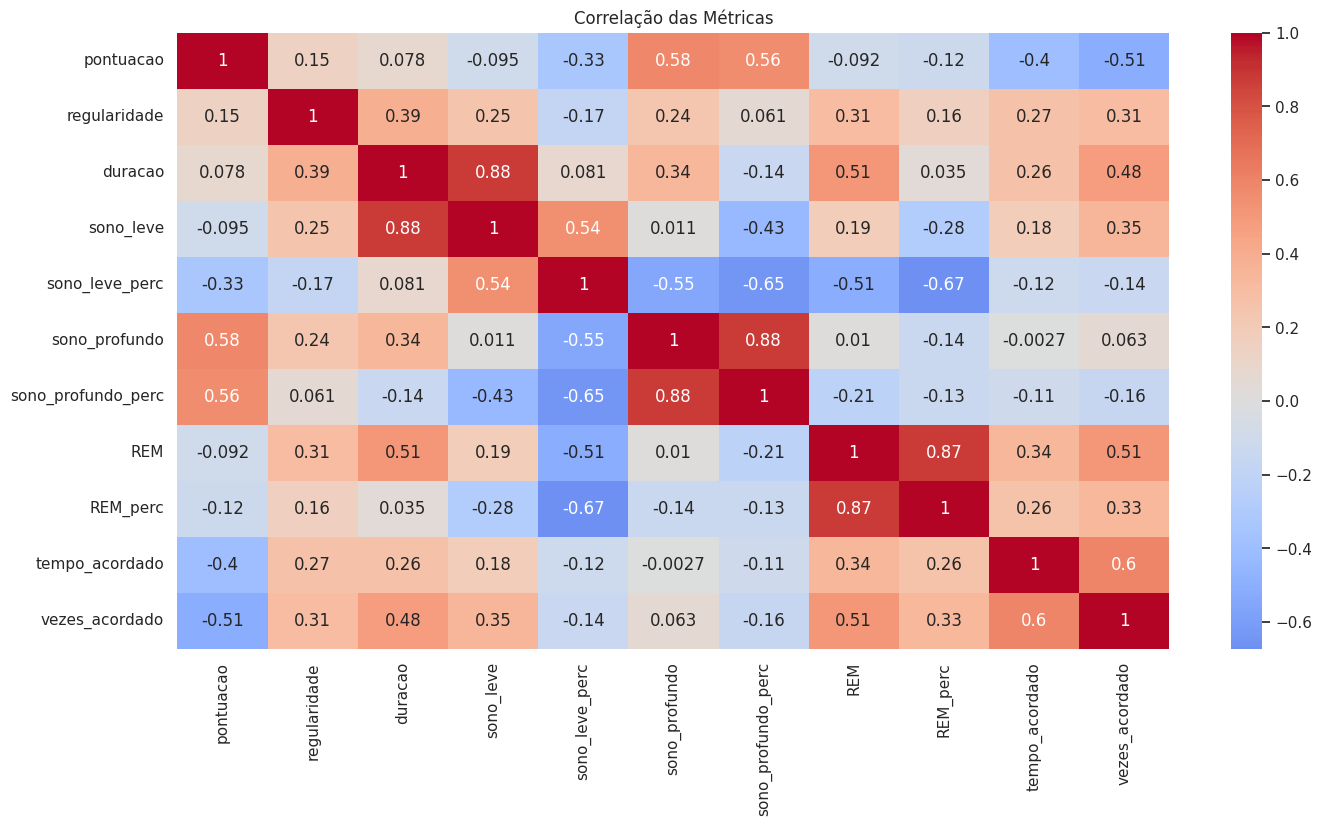

In [18]:
plt.figure(figsize=(16, 8))
sns.heatmap(data[metricas].corr(),  annot=True, cmap="coolwarm", center=0)
plt.title("Correlação das Métricas")
plt.show()

Utilização de Bar Plot (Stacked) para visualizar como está composta a duração do sono 

In [19]:
composicao_sono = ["sono_leve", "sono_profundo", "REM"]

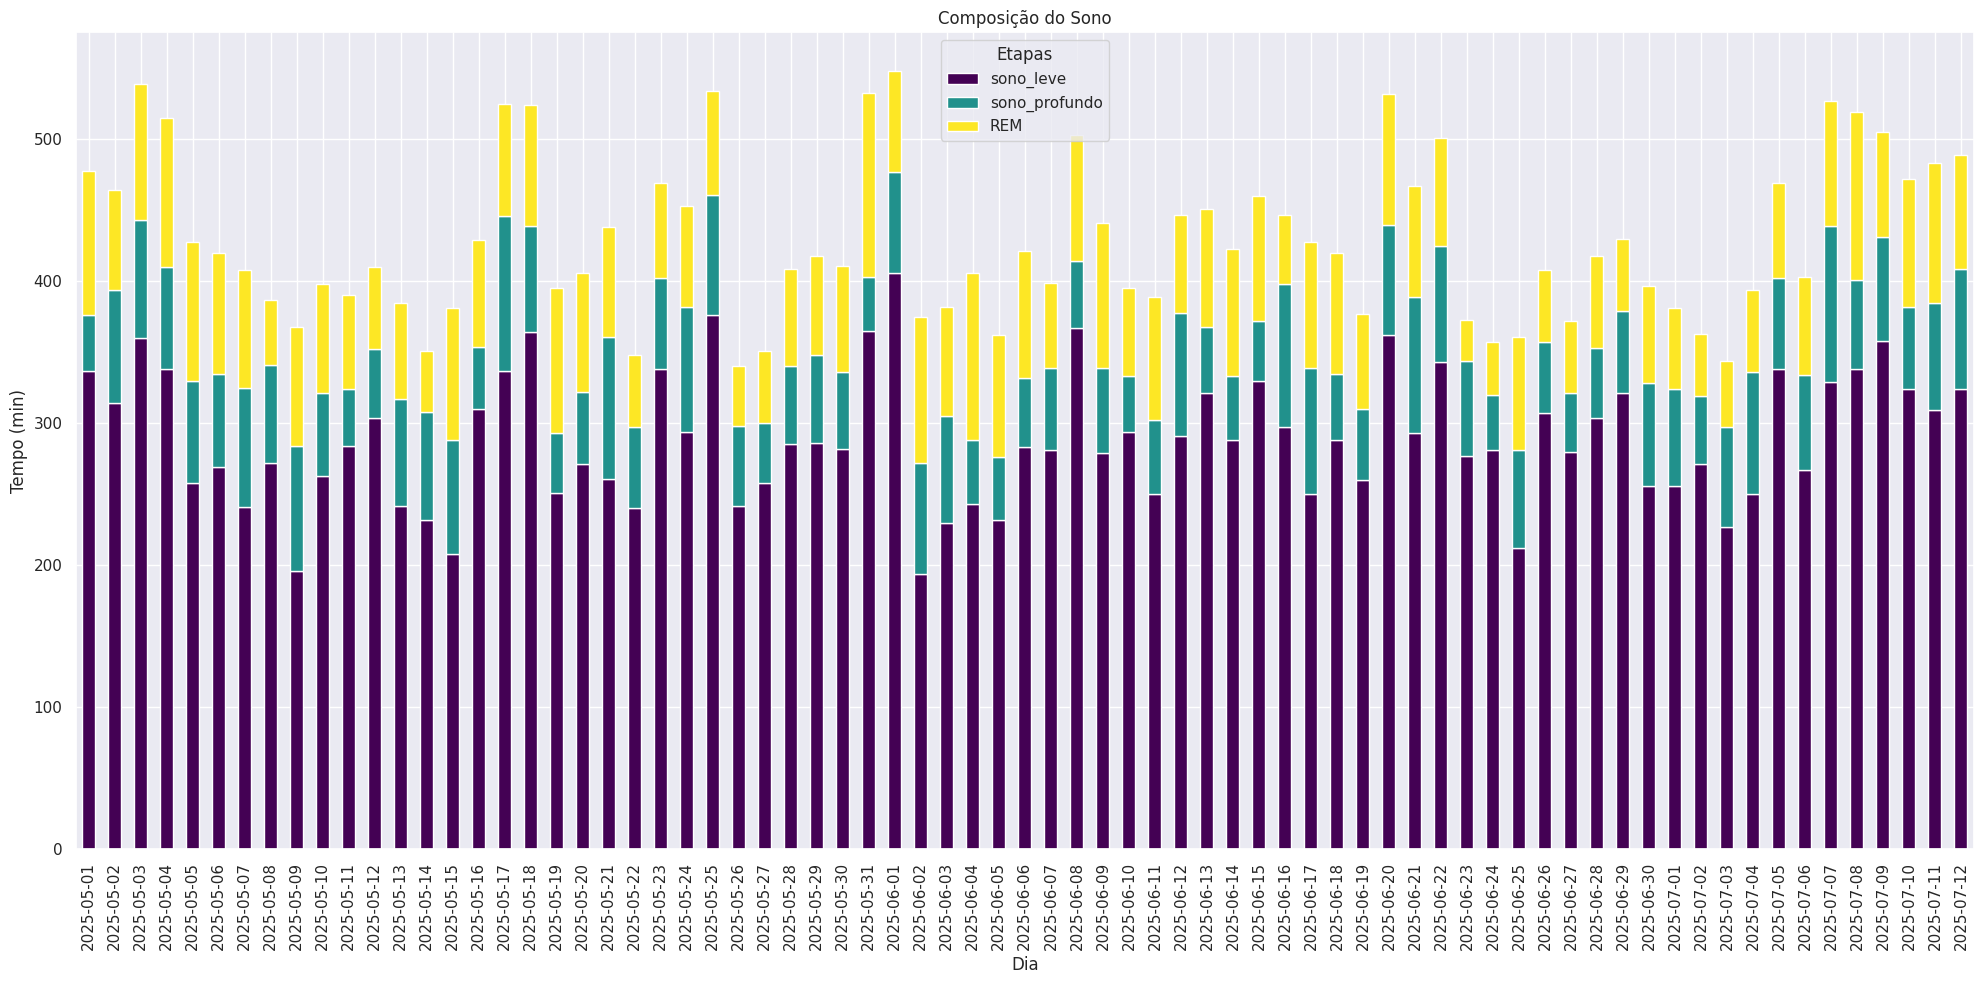

In [20]:

volume = data.groupby("data")[composicao_sono].sum()

ax = volume.plot(
    kind="bar",
    stacked=True,
    figsize=(20, 10),
    colormap="viridis",
)
plt.title("Composição do Sono")
plt.xlabel("Dia")
plt.ylabel("Tempo (min)")
# plt.xticks(rotation=45, ha="right")
plt.legend(title="Etapas")

plt.tight_layout()
plt.show()



In [21]:
total_sono = data[["sono_leve", "sono_profundo", "REM"]].sum()
labels = total_sono.index.tolist()
values = total_sono.values.tolist()

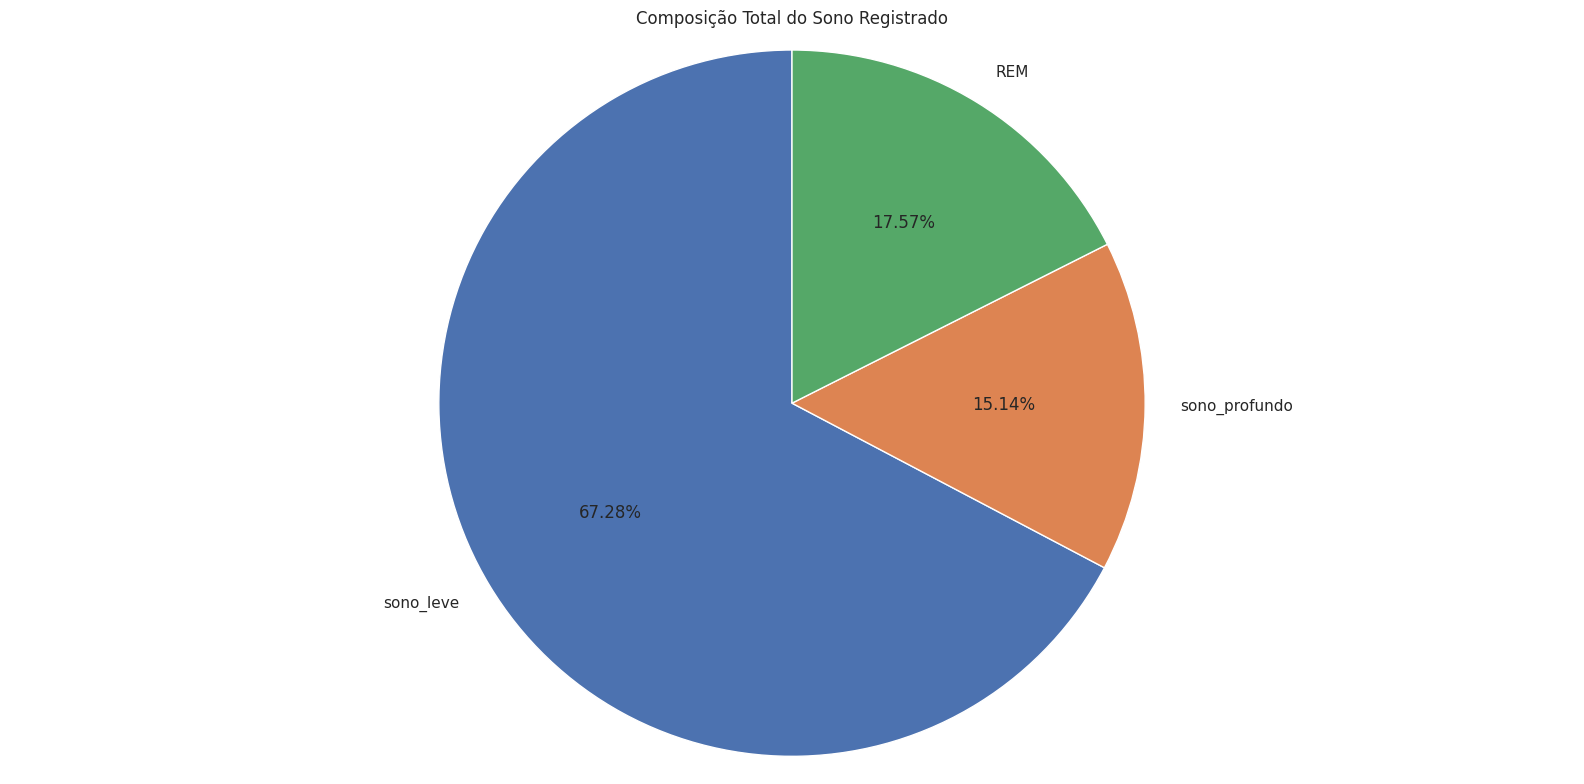

In [22]:
plt.figure(figsize=(16,8))
plt.pie(
    values,
    labels=labels,
    autopct="%1.2f%%",
    startangle=90,
)
plt.title("Composição Total do Sono Registrado")
plt.axis("equal")
plt.tight_layout()
plt.show()

In [23]:
ordem = ["segunda-feira", "terça-feira", "quarta-feira", "quinta-feira", "sexta-feira",
         "sábado", "domingo"]

In [24]:
data_semana = data.copy()

In [25]:
data_semana["dia_semana"] = pd.Categorical(data_semana["dia_semana"], categories=ordem, ordered=True)

In [26]:
medias = data_semana.groupby("dia_semana")["pontuacao"].mean().round(2)

/tmp/ipykernel_9150/2131069414.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = data_semana.groupby("dia_semana")["pontuacao"].mean().round(2)


In [28]:
medias_df = medias.reset_index()
medias_df.columns = ["dia_semana", "pontuacao"]

In [29]:
medias_df = medias_df.sort_values("pontuacao", ascending=True)

In [30]:
medias_df

,dia_semana,pontuacao
6,domingo,76.10
2,quarta-feira,79.00
3,quinta-feira,79.18
5,sábado,80.00
0,segunda-feira,80.50
1,terça-feira,81.10
4,sexta-feira,81.91


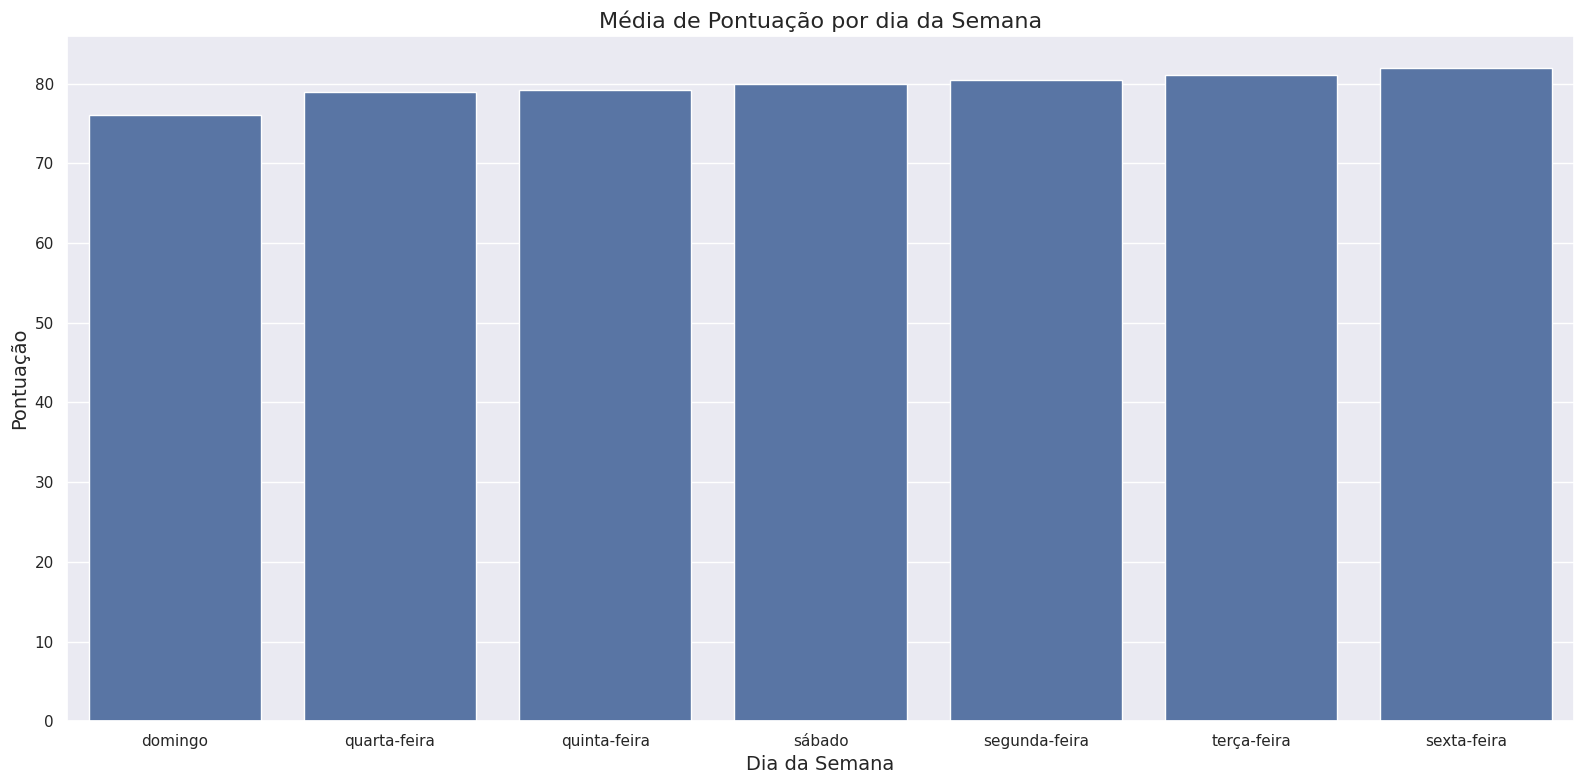

In [31]:
plt.figure(figsize=(16, 8))
sns.barplot(data=medias_df, x="dia_semana", y="pontuacao", order=medias_df["dia_semana"])
plt.title("Média de Pontuação por dia da Semana", size=16)
plt.xlabel("Dia da Semana", size=14)
plt.ylabel("Pontuação", size=14)
plt.tight_layout()
plt.show()

In [ ]:
# segunda = data.loc[data["dia_semana"] == "segunda-feira", "pontuacao"].tolist()
# terca = data.loc[data["dia_semana"] == "terça-feira", "pontuacao"].tolist()
# quarta = data.loc[data["dia_semana"] == "quarta-feira", "pontuacao"].tolist()
# quinta = data.loc[data["dia_semana"] == "quinta-feira", "pontuacao"].tolist()
# sexta = data.loc[data["dia_semana"] == "sexta-feira", "pontuacao"].tolist()
# sabado = data.loc[data["dia_semana"] == "sábado", "pontuacao"].tolist()
# domingo = data.loc[data["dia_semana"] == "domingo", "pontuacao"].tolist()

# import numpy as np

# media_segunda = np.mean(segunda)
# media_terca = np.mean(terca)
# media_quarta = np.mean(quarta)
# media_quinta = np.mean(quinta)
# media_sexta = np.mean(sexta)
# media_sabado = np.mean(sabado)
# media_domingo = np.mean(domingo)

In [39]:
data_ordenado = data.sort_values(by="pontuacao", ascending=False)
maiores = data_ordenado.head(15)
menores = data_ordenado.tail(15)

In [40]:
maiores_dias_semana = maiores["dia_semana"].value_counts()
maiores_dias_semana

dia_semana
terça-feira      4
sexta-feira      3
quinta-feira     3
sábado           3
domingo          1
segunda-feira    1
Name: count, dtype: int64

In [41]:
menores_dias_semana = menores["dia_semana"].value_counts()
menores_dias_semana

dia_semana
quarta-feira     3
quinta-feira     3
domingo          3
segunda-feira    2
terça-feira      2
sábado           2
Name: count, dtype: int64

In [42]:
maiores

,data,dia_semana,pontuacao,regularidade,duracao,sono_leve,sono_leve_perc,sono_profundo,sono_profundo_perc,REM,REM_perc,tempo_acordado,vezes_acordado
1,2025-05-02,sexta-feira,93,90,464,314,67.67,80,17.24,70,15.09,6,1
52,2025-06-22,domingo,91,80,501,343,68.46,82,16.37,76,15.17,11,1
12,2025-05-13,terça-feira,90,75,385,242,62.86,75,19.48,68,17.66,0,0
5,2025-05-06,terça-feira,89,88,420,269,64.05,66,15.71,85,20.24,8,2
47,2025-06-17,terça-feira,89,74,428,250,58.41,89,20.79,89,20.79,4,1
16,2025-05-17,sábado,88,88,525,337,64.19,109,20.76,79,15.05,9,2
22,2025-05-23,sexta-feira,88,76,469,338,72.07,64,13.65,67,14.29,3,1
42,2025-06-12,quinta-feira,88,85,447,291,65.10,87,19.46,69,15.44,8,2
33,2025-06-03,terça-feira,88,79,382,230,60.21,75,19.63,77,20.16,7,1
23,2025-05-24,sábado,88,78,453,294,64.90,88,19.43,71,15.67,13,2


In [50]:
media_pontuacao_maiores = maiores["pontuacao"].mean().round(2)
media_duracao_maiores = maiores["duracao"].mean().round(2)
media_sono_leve_perc_maiores = maiores["sono_leve_perc"].mean().round(2)
media_sono_profundo_perc_maiores = maiores["sono_profundo_perc"].mean().round(2)
media_rem_perc_maiores = maiores["REM_perc"].mean().round(2)
media_tempo_acordado_maiores = maiores["tempo_acordado"].mean().round(2)
media_vezes_acordado_maiores = maiores["vezes_acordado"].mean().round(2)

In [ ]:
media_pontuacao_menores = menores["pontuacao"].mean().round(2)
media_duracao_menores = menores["duracao"].mean().round(2)
media_sono_leve_perc_menores = menores["sono_leve_perc"].mean().round(2)
media_sono_profundo_perc_menores = menores["sono_profundo_perc"].mean().round(2)
media_rem_perc_menores = menores["REM_perc"].mean().round(2)
media_tempo_acordado_menores = menores["tempo_acordado"].mean().round(2)
media_vezes_acordado_menores = menores["vezes_acordado"].mean().round(2)

In [51]:
print("Média das Maiores 15 Pontuações registradas")
print("-------------------------------------------")
print(f"Pontuação: {media_pontuacao_maiores}")
print(f"Duração: {media_duracao_maiores}")
print(f"Sono Leve %: {media_sono_leve_perc_maiores}")
print(f"Sono Profundo %: {media_sono_profundo_perc_maiores}")
print(f"REM %: {media_rem_perc_maiores}")
print(f"Tempo acordado: {media_tempo_acordado_maiores}")
print(f"Vezes acordado: {media_vezes_acordado_maiores}")


Média das Maiores 15 Pontuações registradas
-------------------------------------------
Pontuação: 88.27
Duração: 435.2
Sono Leve %: 65.31
Sono Profundo %: 17.77
REM %: 16.92
Tempo acordado: 6.93
Vezes acordado: 1.27


In [ ]:
print("Média das Menores 15 Pontuações registradas")
print("-------------------------------------------")
print(f"Pontuação: {media_pontuacao_menores}")
print(f"Duração: {media_duracao_menores}")
print(f"Sono Leve %: {media_sono_leve_perc_menores}")
print(f"Sono Profundo %: {media_sono_profundo_perc_menores}")
print(f"REM %: {media_rem_perc_menores}")
print(f"Tempo acordado: {media_tempo_acordado_menores}")
print(f"Vezes acordado: {media_vezes_acordado_menores}")
print("-------------------------------------------")

Média das Menores 15 Pontuações registradas
-------------------------------------------
Pontuação: 69.67
Duração: 421.13
Sono Leve %: 69.01
Sono Profundo %: 12.38
REM %: 18.61
Tempo acordado: 18.47
Vezes acordado: 3.2


In [57]:
print("Diferença entre as Maiores e Menores")
print("------------------------------------")
print(f"Pontuação: {media_pontuacao_maiores - media_pontuacao_menores:.2f}")
print(f"Duração: {media_duracao_maiores - media_duracao_menores:.2f}")
print(f"Sono Leve %: {media_sono_leve_perc_maiores - media_sono_leve_perc_menores:.2f}")
print(f"Sono Profundo %: {media_sono_profundo_perc_maiores - media_sono_profundo_perc_menores:.2f}")
print(f"REM %: {media_rem_perc_maiores - media_rem_perc_menores:.2f}")
print(f"Tempo acordado: {media_tempo_acordado_maiores - media_tempo_acordado_menores:.2f}")
print(f"Vezes acordado: {media_vezes_acordado_maiores - media_vezes_acordado_menores:.2f}")
print("------------------------------------")

Diferença entre as Maiores e Menores
------------------------------------
Pontuação: 18.60
Duração: 14.07
Sono Leve %: -3.70
Sono Profundo %: 5.39
REM %: -1.69
Tempo acordado: -11.54
Vezes acordado: -1.93
------------------------------------
